In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [60]:
from functools import reduce

In [61]:
def kron(fac:list):
    return reduce(np.kron, fac)

In [62]:
edge = [
    (1, 2), 
    (1, 3), 
    (1, 5), 
    (1, 6), 
    (2, 3), 
    (2, 4),
    (2, 5),
    (4, 6)
]
node = 6

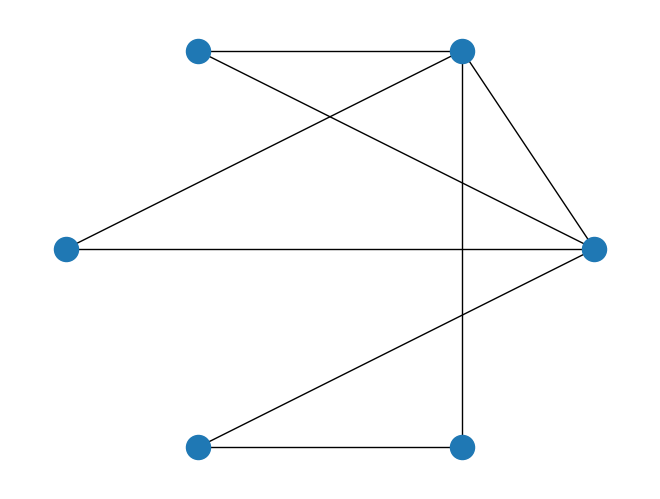

In [63]:
G = nx.Graph()
G.add_edges_from(edge)

nx.draw_circular(G)

In [64]:
I = np.eye(N=2)
Z = np.array([
    [1, 0],
    [0, -1]
])

In [96]:
H = 0
for i in edge:
    tmp = []
    for j in range(node):
        if j in i:
            tmp.append(Z)
        else:
            tmp.append(I)
    H += np.eye(64) - kron(tmp)

H = H // 2
    

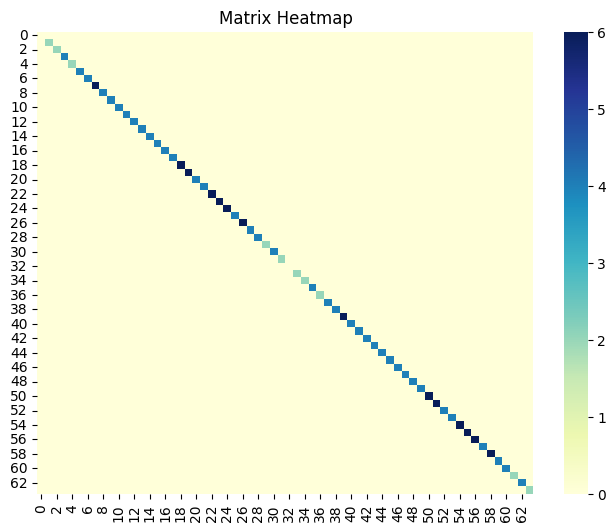

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(H, cmap="YlGnBu", cbar=True)
plt.title("Matrix Heatmap")
plt.show()

In [98]:
ans = np.diag(H)
max(ans)

np.float64(6.0)

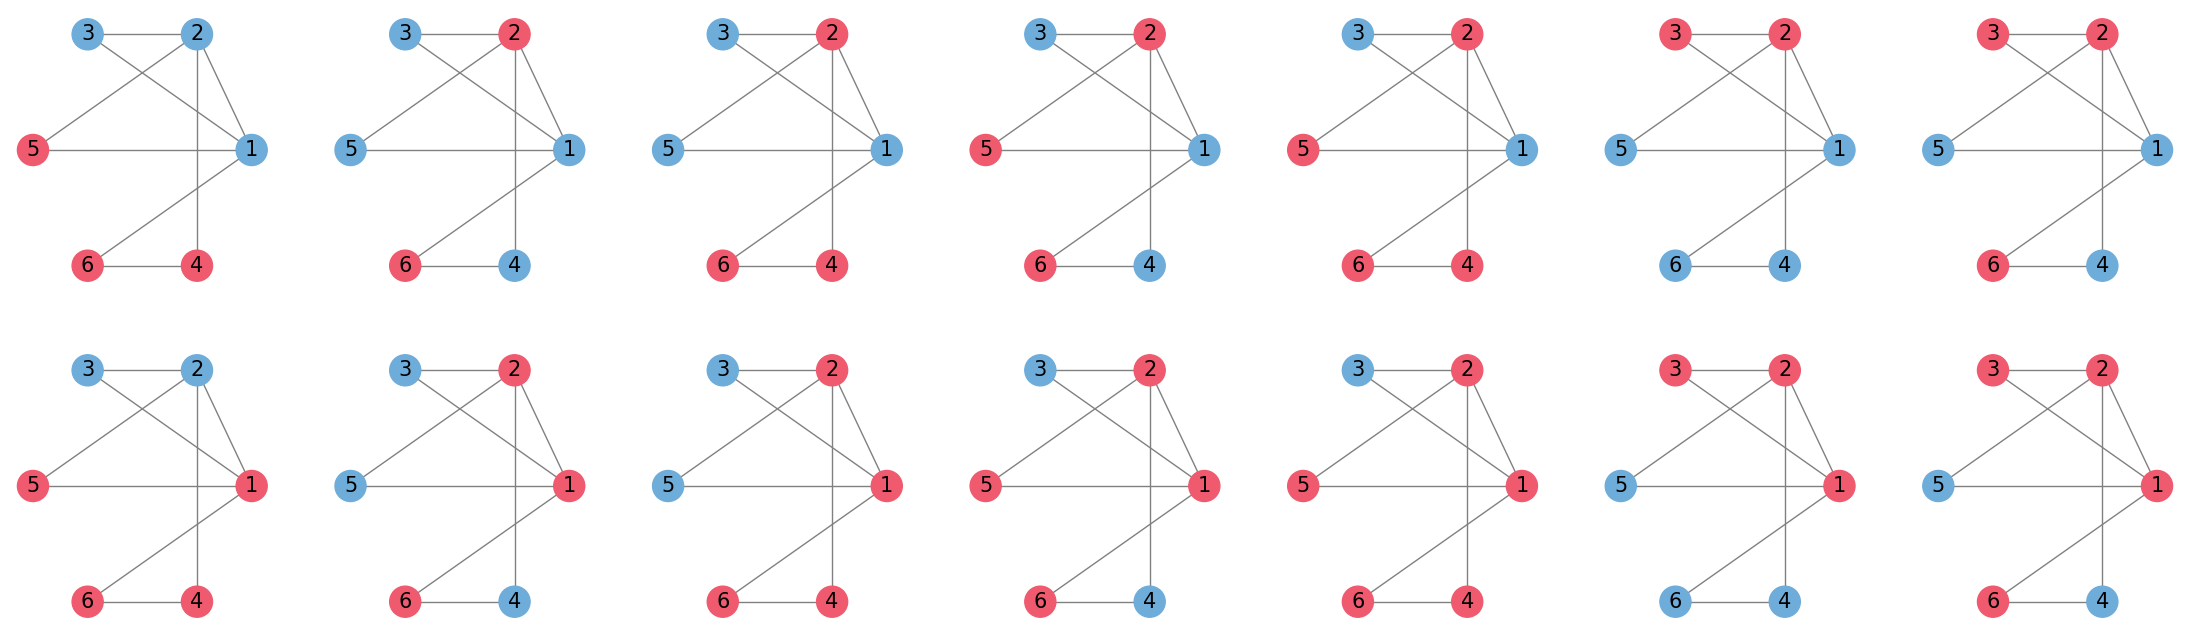

In [100]:
color_map = {
    "0": "#6EACDA",
    "1": "#EF5A6F"
}

sol = []
num = []
for i in range(64):
    if ans[i] == 6:
        a = bin(i)[2:].zfill(6)
        node_colors = [color_map[p] for p in a]
        sol.append(node_colors)
        num.append(a)

# 서브플롯 설정
num_solutions = len(sol)
fig, axs = plt.subplots(2, (num_solutions + 1) // 2, figsize=(num_solutions * 2, 8))

# 2차원 배열을 1차원 배열로 평탄화
if num_solutions > 1:
    axs = axs.flatten()

for idx, node_colors in enumerate(sol):
    ax = axs[idx] if num_solutions > 1 else axs
    nx.draw_circular(G, node_color=node_colors, with_labels=True, node_size=500, font_size=15, edge_color='gray', ax=ax)

# 사용되지 않은 서브플롯 숨기기
for idx in range(num_solutions, len(axs)):
    fig.delaxes(axs[idx])

plt.show()
